In [1]:
!unzip 'eye_closures.zip'

Archive:  eye_closures.zip
  inflating: dataset/train/closed/Thumbs.db  
  inflating: dataset/train/closed/closed_eye_0002.jpg_face_2_L.jpg  
  inflating: dataset/train/closed/closed_eye_0002.jpg_face_2_R.jpg  
  inflating: dataset/train/closed/closed_eye_0003.jpg_face_2_L.jpg  
  inflating: dataset/train/closed/closed_eye_0003.jpg_face_2_R.jpg  
  inflating: dataset/train/closed/closed_eye_0007.jpg_face_1_L.jpg  
  inflating: dataset/train/closed/closed_eye_0007.jpg_face_1_R.jpg  
  inflating: dataset/train/closed/closed_eye_0009.jpg_face_1_L.jpg  
  inflating: dataset/train/closed/closed_eye_0009.jpg_face_1_R.jpg  
  inflating: dataset/train/closed/closed_eye_0012.jpg_face_1_L.jpg  
  inflating: dataset/train/closed/closed_eye_0012.jpg_face_1_R.jpg  
  inflating: dataset/train/closed/closed_eye_0013.BMP_face_1_L.jpg  
  inflating: dataset/train/closed/closed_eye_0014.jpg_face_2_L.jpg  
  inflating: dataset/train/closed/closed_eye_0015.jpg_face_1_L.jpg  
  inflating: dataset/train/clo

In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Function to load image
def load_dataset(data_dir, class_names=['closed', 'open'], img_size=(224, 224)):
    x = []
    y = []

    for label, folder_name in enumerate(class_names):
        folder_path = os.path.join(data_dir, folder_name)
        for img_name in os.listdir(folder_path):
            if not img_name.lower().endswith('.jpg'):
                continue  # Skip non-JPG files

            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                x.append(img)
                y.append(label)
            else:
                print(f"Failed to load image: {img_path}")

    return np.array(x), np.array(y)
# Load the train and val dataset
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'
X_train, y_train = load_dataset(train_dir)
X_val, y_val = load_dataset(val_dir)

In [4]:
# Split the train, test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [5]:
# Print shape of each
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3024, 224, 224, 3)
y_train shape: (3024,)
X_val shape: (1068, 224, 224, 3)
y_val shape: (1068,)
X_test shape: (756, 224, 224, 3)
y_test shape: (756,)


In [7]:
img_size = (224, 224)
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the early stopping criteria
early_stop = EarlyStopping(
    monitor='val_loss',       # Monitor validation loss
    patience=10,               # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Revert to the best model weights
)

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Create data generators for training and validation
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_data_gen = ImageDataGenerator(rescale=1./255)

In [12]:
# Train the model with EarlyStopping
history = model.fit(
    train_data_gen.flow(X_train, y_train, batch_size=32),
    validation_data=val_data_gen.flow(X_val, y_val),
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 48s 419ms/step - accuracy: 0.5344 - loss: 0.6897 - val_accuracy: 0.7509 - val_loss: 0.4905
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 35s 367ms/step - accuracy: 0.7840 - loss: 0.4673 - val_accuracy: 0.8455 - val_loss: 0.3848
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 363ms/step - accuracy: 0.8361 - loss: 0.3721 - val_accuracy: 0.8773 - val_loss: 0.2964
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 35s 367ms/step - accuracy: 0.8785 - loss: 0.3105 - val_accuracy: 0.8961 - val_loss: 0.2710
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 354ms/step - accuracy: 0.8972 - loss: 0.2736 - val_accuracy: 0.8914 - val_loss: 0.2697
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 42s 364ms/step - accuracy: 0.8935 - loss: 0.2563 - val_accuracy: 0.9064 - val_loss: 0.2282
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 35s 368ms/step - accuracy: 0.9099 - loss: 0.2282 - val_accuracy: 0.9242 - val_loss: 0.2048
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 357ms/step - accuracy: 0.9217 - loss: 0.2034 - val_accu

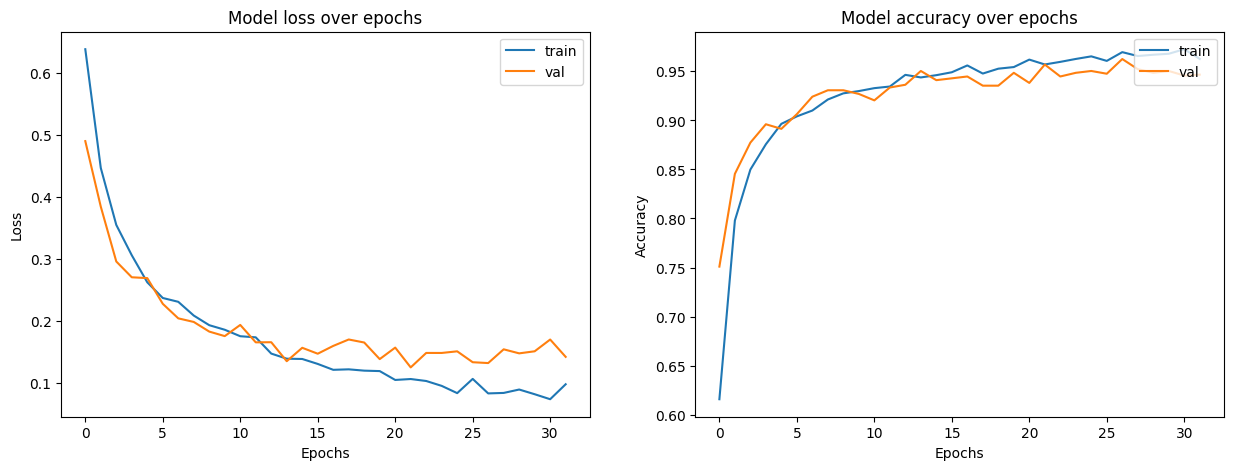

In [13]:
# Initialize the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot model loss during training
ax1.plot(history.history["loss"])
ax1.plot(history.history["val_loss"])
ax1.legend(["train", "val"], loc="upper right")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Model loss over epochs")

# Plot model accuracy during training
ax2.plot(history.history["accuracy"])
ax2.plot(history.history["val_accuracy"])
ax2.legend(["train", "val"], loc="upper right")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_title("Model accuracy over epochs")
plt.show()

In [14]:
# Normalize test data
x_test_scaled = X_test / 255.0
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test, verbose=0)
# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.1017
Test Accuracy: 0.9656


In [15]:
# Save the model
model.save('eye_closures_model.h5')